In [7]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
            epochs=10,
            batch_size=128,
            validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.6598 - acc: 0.5940 - val_loss: 0.6106 - val_acc: 0.6690
Epoch 2/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.4390 - acc: 0.8073 - val_loss: 0.4069 - val_acc: 0.8238
Epoch 3/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.3039 - acc: 0.8783 - val_loss: 0.4654 - val_acc: 0.7954
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2157 - acc: 0.9172 - val_loss: 0.4772 - val_acc: 0.7894
Epoch 5/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1333 - acc: 0.9534 - val_loss: 0.4587 - val_acc: 0.8210
Epoch 6/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.0940 - acc: 0.9674 - val_loss: 0.4903 - val_acc: 0.8254
Epoch 7/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.0482 - acc: 0.9864 - val_loss: 0.5933 - val_acc:

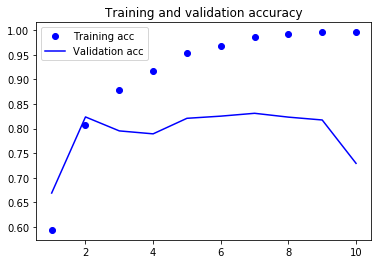

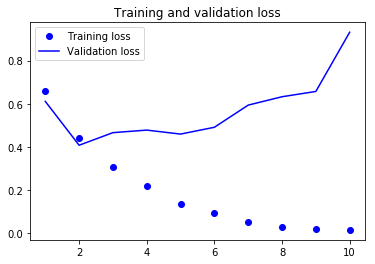

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()